### Linear Regression

$$
y = \beta_0 + \beta_1 x
$$


### Multiple Linear Regression

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$


### Polynomial Regression

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \dots + \beta_n x^n
$$


## Why Do We Need Polynomial Regression?

### 1. When Data is Non-Linear

Linear Regression assumes a straight-line relationship:

y = β₀ + β₁x

However, many real-world relationships are curved rather than linear.  
Polynomial Regression allows us to model these non-linear patterns.

---

### 2. To Reduce Underfitting

If a linear model fails to capture the true pattern of the data,  
it results in underfitting.

By adding polynomial terms (x², x³, ...), the model becomes more flexible  
and can better fit complex relationships.

---

### 3. To Capture Complex Real-World Patterns

Examples:
- Salary vs Experience (growth may slow after certain years)
- Population growth
- Learning curves
- Temperature changes over time

These relationships are often not perfectly linear.

---

### 4. It Is Still Linear in Parameters

Even though the output curve looks non-linear,  
Polynomial Regression is still Linear Regression applied to transformed features (x², x³, ...).

The model remains linear its coefficients.

---

## Conclusion

Polynomial Regression is useful when:
- The relationship between input and output is curved
- Linear Regression underfits the data
- A more flexible model is needed without moving to complex algorithms


## Polynomial Regression

### For 2D (Degree 2)

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2
$$

---

### For 3D (Degree 3)

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3
$$


### when there are multiple input features
$$
y = \beta_0 
+ \beta_1 x_1 
+ \beta_2 x_2 
+ \beta_3 x_1^2 
+ \beta_4 x_2^2 
+ \beta_5 x_1 x_2
$$

```pythoon 
PolynomialFeatures(degree=2)


# Code  demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , SGDRegressor 

In [2]:
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import r2_score 
from sklearn.pipeline import Pipeline

In [3]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x² + 0.9x + 2

In [4]:
X.shape

(200, 1)

In [5]:
y.shape

(200, 1)

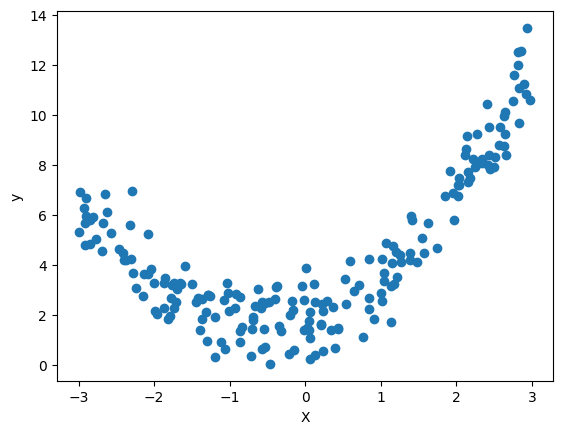

In [6]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.3105791036464046

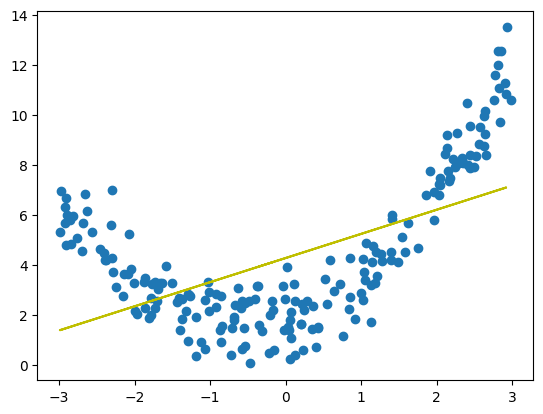

In [11]:
plt.plot(X_train,lr.predict(X_train),color='y')
plt.scatter(X, y)
plt.show()

In [12]:
# Applying Polynomial Linear Regression [degree 2]
poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

# if orginal features are : X = [x] , After transformation (degree = 2), it becomes:[1,x,x^2]

In [13]:
print(X_train[0])
print(X_train_trans[0])

[-0.17801753]
[ 1.         -0.17801753  0.03169024]


In [14]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.9200214161620508

In [16]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.86074264 0.8222515 ]]
[1.83898487]


In [17]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

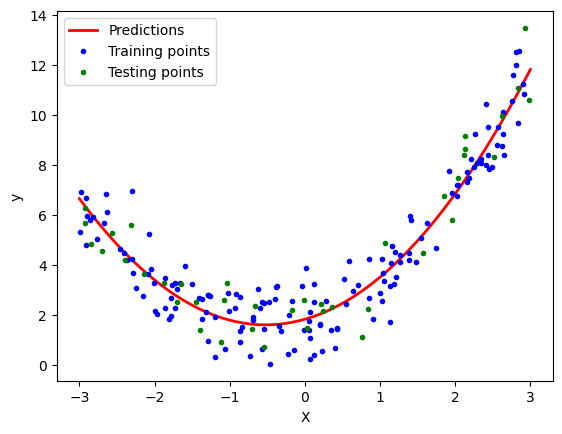

In [18]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## what if you increase degree

In [19]:
def polynomial_regression(degree):
    
    # Create smooth X values for plotting
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    
    # Create Pipeline: Polynomial Features → Scaling → Linear Regression
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict on smooth data
    y_new = model.predict(X_new)
    
    # Plot prediction curve
    plt.plot(X_new, y_new, "r-", linewidth=2, label=f"Degree {degree}")
    
    # Plot training & testing points
    plt.plot(X_train, y_train, "b.", label="Training points")
    plt.plot(X_test, y_test, "g.", label="Testing points")
    
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend(loc="upper left")
    plt.axis([-3, 3, 0, 10])
    plt.show()

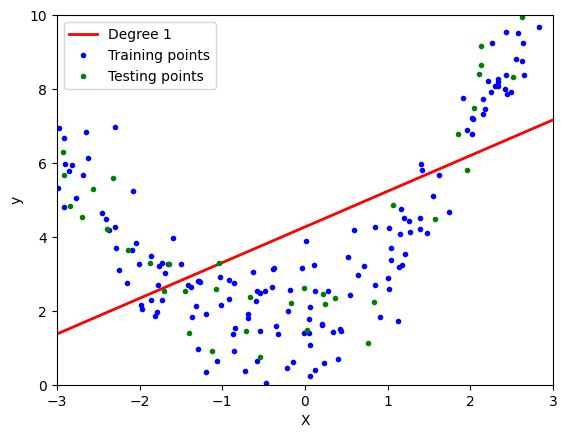

In [20]:
polynomial_regression(1)   # Linear

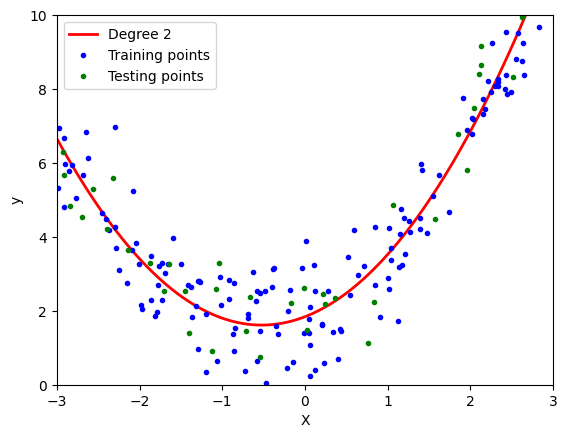

In [21]:
polynomial_regression(2)   # Correct model

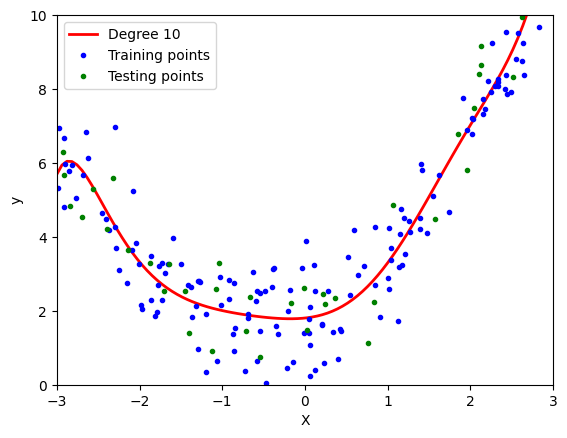

In [22]:
polynomial_regression(10)  # High degree

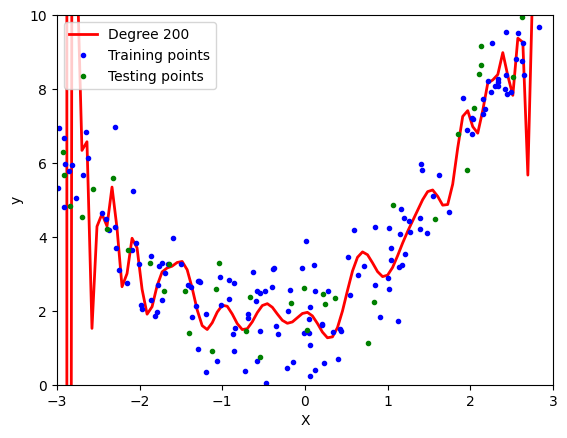

In [24]:
polynomial_regression(200)  # Overfitting

In [25]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)

### applying gradient descent 

In [26]:
# Step 1: Convert to Polynomial Features
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [27]:
# Step 2: Apply Gradient Descent
sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans, y_train)

C:\Users\diwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [28]:
# Step 3: Create Smooth Points for Plotting
X_new = np.linspace(-4, 4, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)

In [29]:
y_new = sgd.predict(X_new_poly)
y_pred = sgd.predict(X_test_trans)

In [30]:
r2_score(y_test , y_pred)

0.9190293058510117

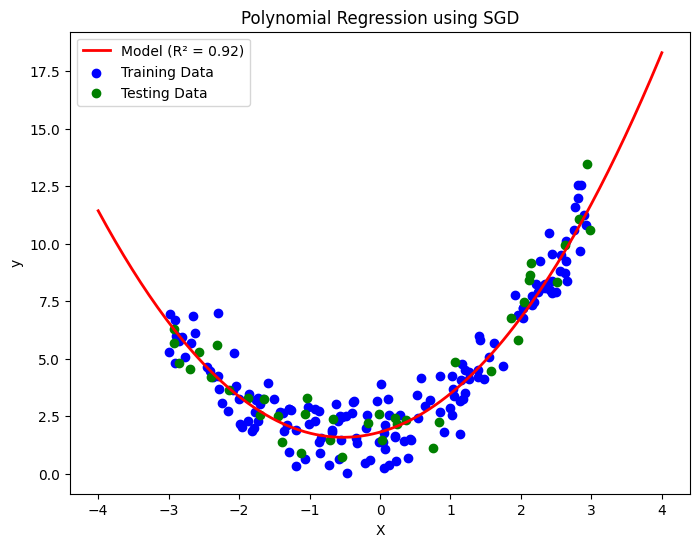

In [31]:
plt.figure(figsize=(8,6))

# Model prediction curve
plt.plot(X_new, y_new, "r-", linewidth=2, 
         label="Model (R² = " + str(round(r2_score(y_test, y_pred), 2)) + ")")

# Training data
plt.scatter(X_train, y_train, color="blue", label="Training Data")

# Testing data
plt.scatter(X_test, y_test, color="green", label="Testing Data")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression using SGD")
plt.show()


# 3D polynomial regression

In [32]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

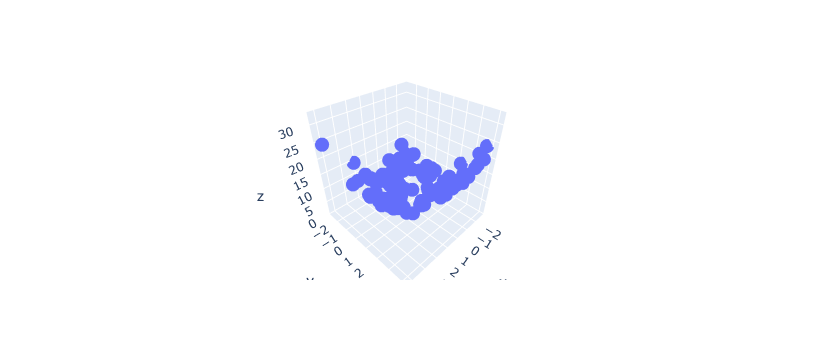

In [33]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [34]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

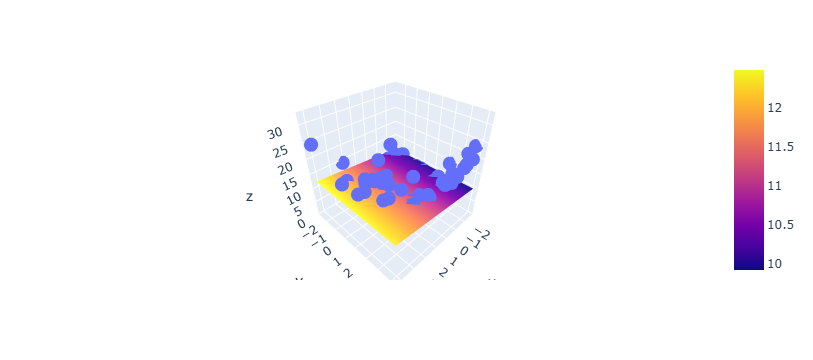

In [35]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [36]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [53]:
poly = PolynomialFeatures(degree=22)
X_multi_trans = poly.fit_transform(X_multi)

In [54]:
print("Input features:", poly.n_features_in_)
print("Output features:", poly.n_output_features_)
print("Powers:\n", poly.powers_)

Input features: 2
Output features: 276
Powers:
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0

In [55]:
X_multi_trans.shape

(100, 276)

In [56]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
X_test_multi = poly.transform(final)

In [58]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

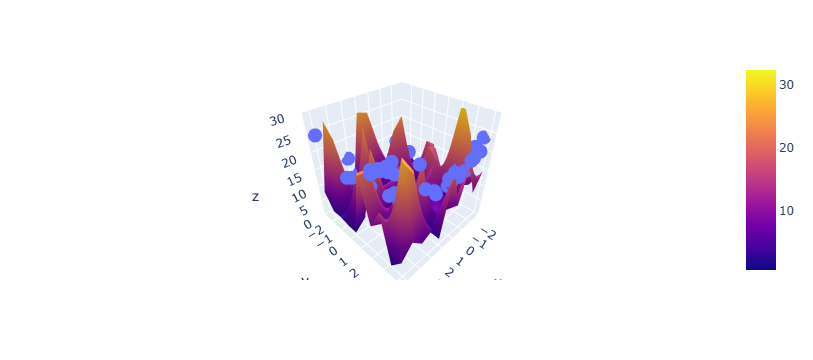

In [59]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,30])))

fig.show()

In [60]:
# Train Pipeline